In [1]:
import numpy as np

def stress_at_corner(m, n, load):
    '''
    Compute the vertical stress at the corner of a 
    rectangular loaded area.

    Input:
    m: rectangle_width/depth_of_point
    n: rectangle_length/depth_of_point
    load: load on the rectangle in kN/m^2
    
    Output:
    vertical stress at the corner in kN/m^2
    '''
    
    # compute the terms in the equation 10.38 of Das
    term_1 = m**2 + n**2 + 1
    term_2 = 2*m*n*np.sqrt(term_1)
    term_3 = m**2 * n**2
    term_4 = term_2 / (term_1 + term_3)
    term_5 = (term_1+1) / term_1
    term_6 = np.arctan(term_2/(term_1-term_3))
    
    # term_6 should be a positive angle in radians
    if term_6 < 0.0:
        term_6 = term_6 + np.pi
    
    # compute I3
    I3 = (1/(4*np.pi))*(term_4 * term_5 + term_6)
    
    # return the vertical stress
    return load*I3
    
def stress_at_center(m, n, load):
    '''
    Compute the vertical stress at the center of a 
    rectangular loaded area.
    
    Input:
    m: rectangle_length/rectangle_width
    n: depth_of_point/(rectangle_width/2)

    Output:
    vertical stress at the center in kN/m^2
    '''
    
    # compute the terms in equation 10.43 of Das
    term_1 = 1 + m**2 + 2*n**2
    term_2 = np.sqrt(1 + m**2 + n**2)
    term_3 = (1+n**2)*(m**2+n**2)
    term_4 = np.sqrt(m**2+n**2)*np.sqrt(1+n**2)
    
    # compute I4
    I4 = (2/np.pi)*((m*n/term_2)*(term_1/term_3)+np.arcsin(m/term_4))
    
    # return the vertical stress
    return load*I4  

In [2]:
# Define rectangular load
length = 1.0 # m
width = 1.0 # m
load = 1.0  # KN/m^2
# depth to point of interest
depth = 2.0 # m

# stress at corner of rectangle
m = width/depth
n = length/depth
stress = stress_at_corner(m, n, load)
print(f'm = {m:.2f}, n = {n:.2f}')
print(f'Stress at corner = {stress:.3f} kN/m^2')

# stress at center of rectangle
m = length/width
n = depth/(width/2)
stress = stress_at_center(m, n, load)
print(f'm1 = {m:.2f}, n1 = {n:.2f}')
print(f'Stress at center = {stress:.3f} kN/m^2')

# stress at center of rectangle can also be computed 
# by the sum of four sub-rectangles with corner at center
length = np.ones(4)*0.5*length
width = np.ones(4)*0.5*width
stress = np.zeros(4)
for i in range(4):
    m = width[i]/depth
    n = length[i]/depth
    stress[i] = stress_at_corner(m, n, load)

stress = np.sum(stress)
print(f'Stress at center using 4 rectangles = {stress:.3f} kN/m^2')

m = 0.50, n = 0.50
Stress at corner = 0.084 kN/m^2
m1 = 1.00, n1 = 4.00
Stress at center = 0.108 kN/m^2
Stress at center using 4 rectangles = 0.108 kN/m^2


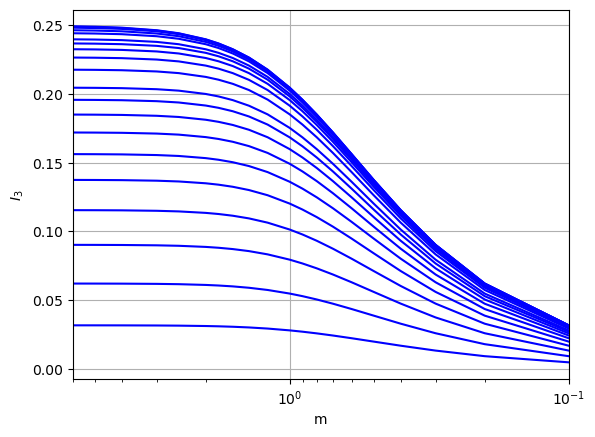

In [ ]:
# reproduce figure 10.36 of Das (2022) textbook
# stress at corner of rectangle
import matplotlib.pyplot as plt

n = np.arange(0.1, 1.05, 0.1)
n = np.append(n, np.arange(1.2, 2.1, 0.2))
n = np.append(n, [2.5, 3.0, 4.0, 5.0, 6.0])
m = n
load = 1.0
I3 = np.zeros((len(n), len(m)))

for i in range(len(n)):
    for j in range(len(m)):
        I3[i, j] = stress_at_corner(m[j], n[i], load)
    plt.plot(m, I3[i, :], 'b-')

plt.xlabel('m')
plt.ylabel(r'$I_3$')
plt.xscale('log')
plt.xlim(6, 0.1)
plt.grid(True)